In [47]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.dpi'] = 300
pyplot.rcParams['savefig.dpi'] = 300

import pandas
import numpy
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The aim is to predict whether a patient has heart disease or not. First we load the available data, which contains the information for each patient, including the coding whether the have heart desease (condition == 1) or not (condition == 0).

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [36]:
heart_cleveland = pandas.read_csv('heart_cleveland_upload.csv')
print(heart_cleveland)
print(heart_cleveland.shape)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

First we extract the X (predictors) and Y (condition) values and split them into test and train sets.

https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas

https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

In [44]:
X = heart_cleveland.drop('condition', axis=1)
Y = heart_cleveland.condition

#mask = numpy.random.rand(len(heart_cleveland)) < 0.8
#train_x = X[mask]
#test_x = X[~mask]

#train_y = Y[mask]
#test_y = Y[~mask]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(237, 13)
(60, 13)
(237,)
(60,)


To identify the most powerful predictors we build a tree for classification:

https://scikit-learn.org/stable/modules/tree.html#classification

https://towardsdatascience.com/evaluating-classification-models-in-python-6b5277e3d524

{0.8: [237, 229, 225, 223, 217, 215, 213, 211, 208, 207, 197, 195, 190, 188, 185, 183, 182, 180, 179, 178, 176, 175, 173, 171, 170, 164, 162, 160, 159, 156, 152, 151, 148, 143, 142, 141, 137, 133, 131, 126, 119, 117, 115, 109, 104, 101, 96, 92, 89, 81, 79, 73, 72, 71, 67, 66, 61, 59, 56, 51, 49, 47, 42, 24, 23, 11], 0.8166666666666667: [236, 233, 232, 230, 228, 226, 222, 220, 218, 205, 192, 168, 167, 166, 161, 155, 154, 153, 150, 139, 136, 128, 124, 114, 108, 107, 106, 105, 102, 99, 94, 65, 63, 55, 48, 45, 36, 32, 26, 21, 19, 18], 0.7833333333333333: [235, 234, 227, 224, 221, 216, 212, 210, 199, 198, 196, 194, 191, 186, 181, 177, 174, 172, 169, 165, 149, 140, 138, 134, 127, 123, 121, 120, 118, 113, 110, 93, 91, 87, 85, 84, 80, 75, 70, 69, 68, 58, 57, 44, 43, 41, 39, 38, 35, 34, 33, 29, 22], 0.8333333333333334: [231, 214, 209, 204, 202, 200, 189, 163, 157, 147, 129, 125, 122, 112, 111, 103, 95, 88, 86, 82, 78, 77, 60, 40, 31, 30, 27, 20, 17, 15], 0.7666666666666667: [219, 203, 193, 187,

[Text(736.25, 841.2857142857143, 'thal <= 0.5\ngini = 0.49\nsamples = 237\nvalue = [135, 102]'),
 Text(310.0, 711.8571428571429, 'thalach <= 111.0\ngini = 0.299\nsamples = 131\nvalue = [107, 24]'),
 Text(232.5, 582.4285714285714, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(387.5, 582.4285714285714, 'oldpeak <= 1.7\ngini = 0.274\nsamples = 128\nvalue = [107, 21]'),
 Text(155.0, 453.00000000000006, 'ca <= 0.5\ngini = 0.227\nsamples = 115\nvalue = [100, 15]'),
 Text(77.5, 323.57142857142867, 'gini = 0.143\nsamples = 90\nvalue = [83, 7]'),
 Text(232.5, 323.57142857142867, 'cp <= 2.5\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(155.0, 194.14285714285722, 'gini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(310.0, 194.14285714285722, 'sex <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(232.5, 64.71428571428578, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(387.5, 64.71428571428578, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(620.0, 453.00000000000006, 'ag

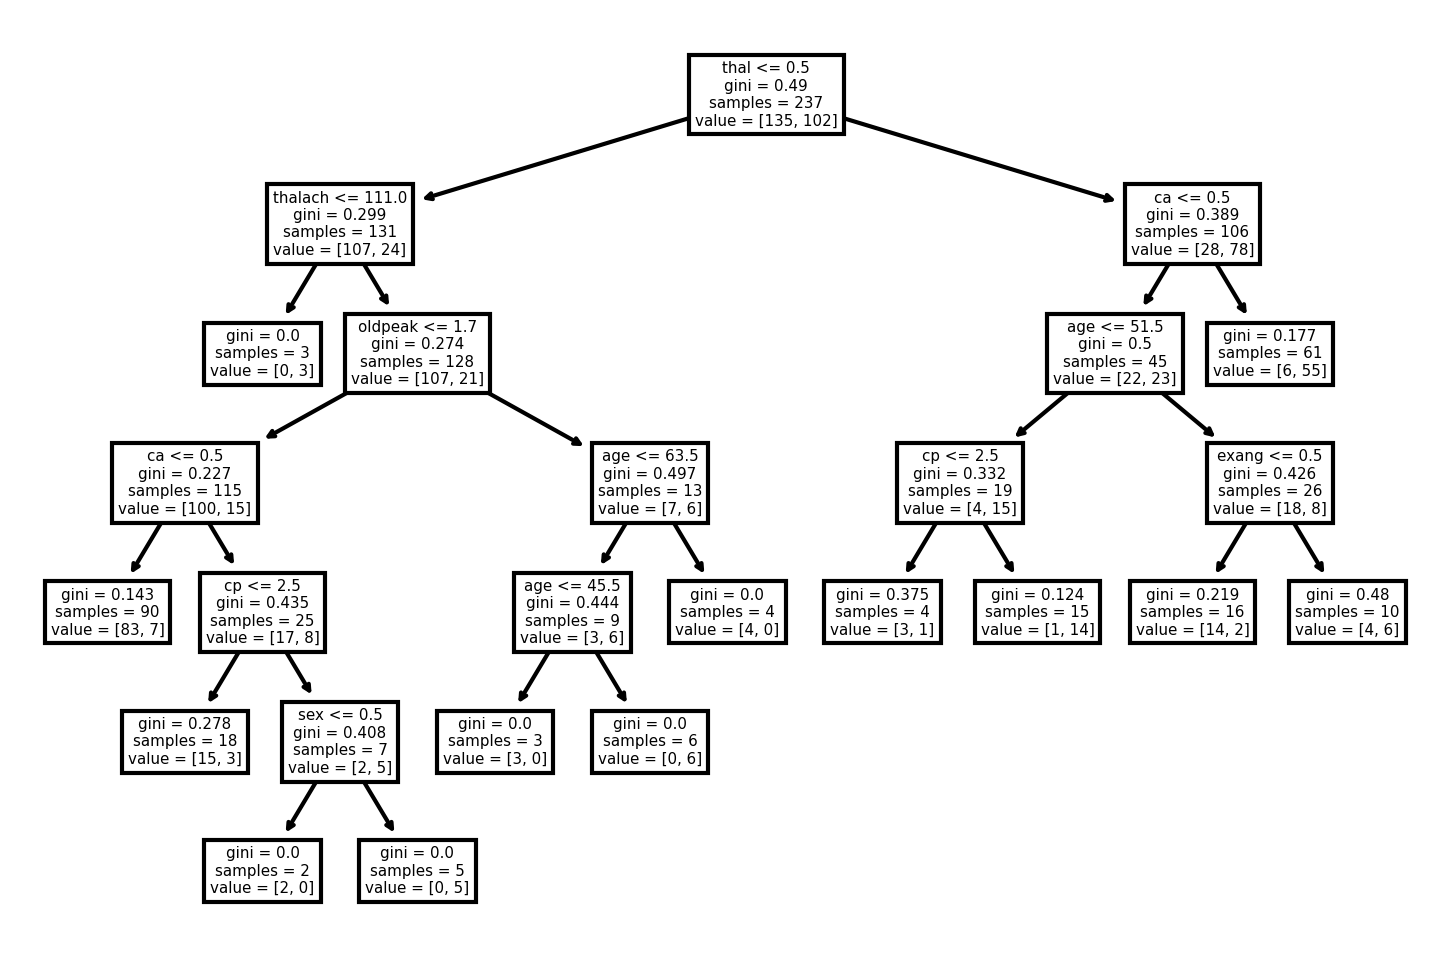

In [93]:
accuracies = {}
best_accuracy = 0

for min_sample_split in range(train_y.size, 2, -1):
    #print(min_sample_split)
    heart_tree = tree.DecisionTreeClassifier(max_leaf_nodes=min_sample_split)
    heart_tree = heart_tree.fit(train_x, train_y)
    pred_y = heart_tree.predict(test_x)
    #pred_y_in = heart_tree.predict(train_x)
    try:
   #     if min_sample_split < accuracies[accuracy_score(test_y, pred_y)]:
        accuracies[accuracy_score(test_y, pred_y)].append(min_sample_split)
    except KeyError:
        accuracies[accuracy_score(test_y, pred_y)] = [min_sample_split]
    
    #print(min_sample_split)
    #print(accuracy_score(test_y, pred_y), best_accuracy)
    if accuracy_score(test_y, pred_y) >= best_accuracy:
        best_accuracy = accuracy_score(test_y, pred_y)
        best_model = heart_tree

    #print('In sample accuracy: ', accuracy_score(train_y, pred_y_in))
    #print('Out of sample accuracy: ', accuracy_score(test_y, pred_y))
print(accuracies)
#print("Most accurate model has a maximum of ", min(accuracies[max(accuracies.keys())]), " leaf nodes.")
#print("The accurace of the model is", max(accuracies.keys()))

print("Most accurate model has a maximum of ", best_model.get_n_leaves(), " leaf nodes.")

#heart_tree = tree.DecisionTreeClassifier(max_leaf_nodes=min(accuracies[max(accuracies.keys())]))
#heart_tree = heart_tree.fit(train_x, train_y)
best_pred_y = best_model.predict(test_x)
print("The accurace of the model is", accuracy_score(test_y, best_pred_y))
tree.plot_tree(best_model, feature_names=train_x.columns)
